In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import os
import os.path
from os import path
from matplotlib import pyplot
from google.colab import files

#Install pydrive to use file from google drive
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate Google User
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# ------------------------------- WEATHER DATA  ----------------------------- # 380 features

#forecasts: (DAH Forecast, make sure synced correctly)
forecasts = drive.CreateFile({'id':"1Fabz0Hz7xSzLZwHFpPrSaxNw4cmPq0vn"})
forecasts.GetContentFile('forecasts.csv')
forecasts_data = pd.read_csv('forecasts.csv', header=0, index_col=0)

#dew_point: 44 nodes
dew_point = drive.CreateFile({'id':"16s5iiVDAlYtw-sAGBX-NgrLfAHluXE47"})
dew_point.GetContentFile('dew_point.csv')
dew_point_data = pd.read_csv('dew_point.csv', header=0, index_col=0)

#cloud_cover: 44 nodes (Klamath falls removed)
cloud_cover = drive.CreateFile({'id':"1d4UODNWWGB4jVHPgCPvykHNrZKFlobpe"})
cloud_cover.GetContentFile('cloud_cover.csv')
cloud_cover_data = pd.read_csv('cloud_cover.csv', header=0, index_col=0)
new_cloud_cover = cloud_cover_data.drop(['Klamath Falls Cloud Cover Forecast'], axis=1)

#precipitation_probability: 44 nodes (Klamath falls removed)
precipitation_probability = drive.CreateFile({'id':"1rTRAkEuFKRijcX5nDDpH7WallYsvxVXJ"})
precipitation_probability.GetContentFile('precipitation_probability.csv')
precipitation_probability_data = pd.read_csv('precipitation_probability.csv', header=0, index_col=0)
new_precipitation_probability= precipitation_probability_data.drop(['Klamath Falls Total Precipitation Forecast'], axis=1)

#temperature: 44 nodes (Klamath falls removed)
temperature = drive.CreateFile({'id':"1CVr_qGTq16Wu6k5anjeQKyV4g3haz88-"})
temperature.GetContentFile('temperature.csv')
temperature_data = pd.read_csv('temperature.csv', header=0, index_col=0)
new_temperature = temperature_data.drop(['Klamath Falls Temperature Forecast'], axis=1)

#total_precipitation: 44 nodes (Klamath falls removed)
total_precipitation = drive.CreateFile({'id':"1UOf2LKYs9uJIk4El773SWxYWIFUoxPtH"})
total_precipitation.GetContentFile('total_precipitation.csv')
total_precipitation_data = pd.read_csv('total_precipitation.csv', header=0, index_col=0)
new_total_precipitation = total_precipitation_data.drop(['Klamath Falls Total Precipitation Forecast'], axis=1)

#wind_gust: 44 nodes (Klamath falls removed)
wind_gust = drive.CreateFile({'id':"1VSASdXLySYgIZ7DR3P3Zq3CM7SKz5VQZ"})
wind_gust.GetContentFile('wind_gust.csv')
wind_gust_data = pd.read_csv('wind_gust.csv', header=0, index_col=0)
new_wind_gust = wind_gust_data.drop(['Klamath Falls Wind Gust Forecast'], axis=1)

#wind_speed: 44 nodes (Klamath falls removed)
wind_speed = drive.CreateFile({'id':"1a_3p14Dc-6RPPaoqHahjUzxbNv9APtd-"})
wind_speed.GetContentFile('wind_speed.csv')
wind_speed_data = pd.read_csv('wind_speed.csv', header=0, index_col=0)
new_wind_speed = wind_speed_data.drop(['Klamath Falls Wind Speed Forecast'], axis=1)

#relative_humidity: 44 nodes (Klamath falls removed)
relative_humidity = drive.CreateFile({'id':"16Wzl106R8pDexOgAa11XEjqXBaOpzlnr"})
relative_humidity.GetContentFile('relative_humidity.csv')
relative_humidity_data = pd.read_csv('relative_humidity.csv', header=0, index_col=0)
new_relative_humidity = relative_humidity_data.drop(['Klamath Falls Relative Humidity Forecast'], axis=1)

# ------------------------------- MERGING WEATHER DATA ----------------------------- 
#380 weather data features, Using merge function by setting how='left' (left-join) on column "hour"
#The pandas file with forecasts is always on the left, as it has all hours in range.

merge1 = pd.merge(forecasts_data, dew_point_data,
                   on='hour', 
                   how='left')

merge2 = pd.merge(merge1, new_cloud_cover,
                  on='hour', 
                   how='left')

merge3 = pd.merge(merge2, new_precipitation_probability,
                  on='hour', 
                   how='left')

merge4 =  pd.merge(merge3, new_temperature,
                   on='hour', 
                   how='left')

merge5 = pd.merge(merge4, new_total_precipitation,
                  on='hour', 
                   how='left')

merge6 = pd.merge(merge5, new_wind_gust,
                  on='hour', 
                   how='left')


merge7 = pd.merge(merge6, new_wind_speed,
                  on='hour', 
                   how='left')


merged_weather = pd.merge(merge7, new_relative_humidity,
                  on='hour', 
                   how='left')

merged_weather.head(5)

,CAISO-SP15 Wind Power Generation Forecast,CAISO Total Hydro Power Generation Forecast,CAISO Photovoltaic Power Generation Forecast,CAISO-AZPS Power Demand Forecast,CAISO-SDGE Power Demand Forecast,CAISO-NEVP Power Demand Forecast,CAISO Total Power Demand Forecast,CAISO-ZP26 Photovolataic Power Generation Forecast,CAISO Total Wind Power Generation Forecast,CAISO-PACE Power Demand Forecast,...,San Francisco Relative Humidity Forecast,San Jose Relative Humidity Forecast,San Luis Obispo Relative Humidity Forecast,Santa Rosa Relative Humidity Forecast,Stockton Relative Humidity Forecast,The Dalles Relative Humidity Forecast,Tucson Relative Humidity Forecast,Winnemuca Relative Humidity Forecast,Yreka Relative Humidity Forecast,Yuma Relative Humidity Forecast
hour,,,,,,,,,,,,,,,,,,,,,
2018-02-01 17:00:00,75.00.00,NaN,550.00.00,2950.00.00,2553.00.00,3869.00.00,26377.0,90.00.00,101.00.00,5807.00.00,...,92.0,93.0,76.0,99.0,90.0,92.0,23.0,69.0,87.0,29.0
2018-02-01 18:00:00,70.00.00,NaN,00.00,3199.00.00,2836.00.00,4216.00.00,28843.0,00.00,93.00.00,5930.00.00,...,90.0,87.0,62.0,97.0,84.0,89.0,19.0,59.0,83.0,23.0
2018-02-01 19:00:00,73.00.00,NaN,00.00,3159.00.00,2876.00.00,4247.00.00,29256.0,00.00,92.00.00,5927.00.00,...,83.0,76.0,52.0,93.0,77.0,86.0,14.0,49.0,77.0,18.0
2018-02-01 20:00:00,80.00.00,NaN,00.00,3086.00.00,2774.00.00,4185.00.00,28539.0,00.00,98.00.00,5872.00.00,...,76.0,69.0,42.0,86.0,71.0,81.0,12.0,43.0,69.0,15.0
2018-02-01 21:00:00,84.00.00,NaN,00.00,3033.00.00,2633.00.00,4089.00.00,27629.0,00.00,103.00.00,5680.00.00,...,65.0,62.0,35.0,77.0,67.0,77.0,11.0,40.0,61.0,14.0


In [14]:
# ------------------------------- GET MARKET DATA ----------------------------- # - 3230 features

#ID of folder in Google Drive, where all csv files are orignally stored
fileList = drive.ListFile({'q': "'1Wi3xZHJEc8I7jExU8Am0dwokdxdgXxLV' in parents and trashed=false"}).GetList()
iterations = 0

#Loop over files in drive, and save them to session
for file in fileList:
  print('Received %s files from Files.list()' % len(fileList)) #164 hours
  print('Title: %s, ID: %s' % (file['title'], file['id']))
  fileID = file['id']
  file_content = drive.CreateFile({'id': fileID})
  file_content.GetContentFile(file['title']+'.csv') 
  req_cols = ['OPR_DT','OPR_HR', 'NODE_ID','GROUP','PRC']
  CBNODE_data = pd.read_csv(file['title']+'.csv', header=0, usecols=req_cols,dtype={"GROUP": "int16", "PRC":"float16"}) # int64 can be reduced
  CBNODE_data.to_csv(index=False)
  CBNODE_data.info(verbose=False, memory_usage="deep") 
  CBNODE_data.dtypes
  
  #Count progress
  iterations = iterations + 1
  print(str(iterations) + " out of " + str(len(fileList)))
    
CBNODE_data.head(10)

Received 164 files from Files.list()
Title: 20220805_20220805_PRC_RTPD_LMP_RTPD_17_v1.csv, ID: 1n3LnfANBdox_ScZLxsdD73vMlXKO6Mj2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266624 entries, 0 to 266623
Columns: 5 entries, OPR_DT to GROUP
dtypes: float16(1), int16(1), int64(1), object(2)
memory usage: 38.5 MB
1 out of 164
Received 164 files from Files.list()
Title: 20220805_20220805_PRC_RTPD_LMP_RTPD_05_v1.csv, ID: 1nVz7BI-erGhV7EYbaUbXLKY_C51-LGEV
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266624 entries, 0 to 266623
Columns: 5 entries, OPR_DT to GROUP
dtypes: float16(1), int16(1), int64(1), object(2)
memory usage: 38.5 MB
2 out of 164
Received 164 files from Files.list()
Title: 20220805_20220805_PRC_RTPD_LMP_RTPD_04_v1.csv, ID: 1G8KwMW6KwzOHGM-znnnmmeekFtfVwhwe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266624 entries, 0 to 266623
Columns: 5 entries, OPR_DT to GROUP
dtypes: float16(1), int16(1), int64(1), object(2)
memory usage: 38.5 MB
3 out of 164
Received 164 fil

KeyboardInterrupt: ignored

In [5]:
# -------------- CONVERGENCE BIDDING NODES ----------------- # 
#3230 features(nodes)

#CBNODES - TRADEABLE NODES (subset of Pnodes from FMM data)
CBNODE = drive.CreateFile({'id':"1qPxMeuu8AULUpSPdeIrJ87UQctlK2JxP"})
CBNODE.GetContentFile('CBNODE.csv')
req_cols = ['NODE_ID']
CBNODE_data_true = pd.read_csv('CBNODE.csv', header=0, index_col=0,  usecols=req_cols) 

# -------------- READJUST AND REDUCE MARKET DATA ------------ # 
#- 3230 features, runtime 3 minutes

dir = './'
csvs_list = []
iterations = 0

for file in os.listdir(dir):
  if file.endswith("csv.csv"):
    
      #Getting Pnode data
      csv = pd.read_csv("./" + file, header=0, index_col=0) #Issue trying to reduce amount of columns, OPR_DT
      csv.info(verbose=False, memory_usage="deep") 
      csv.dtypes
      
      #Mergin PNodes to CBNodes only
      cb_csvs = pd.merge(CBNODE_data_true, csv, 
                    on='NODE_ID', #Change to NODE, so we don't neeed bot NODE_ID and NODE 
                    how='left')
      cb_csvs.info(verbose=False, memory_usage="deep") 
      cb_csvs.dtypes

      #CBnodes to list
      csvs_list.append(cb_csvs)  #Write feedback to console

      #Counter
      iterations = iterations + 1
      print("No. " + str(iterations) + " out of " + str(len(os.listdir(dir))))
      
concat = pd.concat(csvs_list)  

#re-adjust the 'OPR_HR' and 'OPR_DT' into weather data's 'hour' format
concat.loc[concat["OPR_HR"] == 1, "OPR_HR"] = "07:00:00"
concat.loc[concat["OPR_HR"] == 2, "OPR_HR"] = "08:00:00"
concat.loc[concat["OPR_HR"] == 3, "OPR_HR"] = "09:00:00"
concat.loc[concat["OPR_HR"] == 4, "OPR_HR"] = "10:00:00"
concat.loc[concat["OPR_HR"] == 5, "OPR_HR"] = "11:00:00"
concat.loc[concat["OPR_HR"] == 6, "OPR_HR"] = "12:00:00"
concat.loc[concat["OPR_HR"] == 7, "OPR_HR"] = "13:00:00"
concat.loc[concat["OPR_HR"] == 8, "OPR_HR"] = "14:00:00"
concat.loc[concat["OPR_HR"] == 9, "OPR_HR"] = "15:00:00"
concat.loc[concat["OPR_HR"] == 10, "OPR_HR"] = "16:00:00"
concat.loc[concat["OPR_HR"] == 11, "OPR_HR"] = "17:00:00"
concat.loc[concat["OPR_HR"] == 12, "OPR_HR"] = "18:00:00"
concat.loc[concat["OPR_HR"] == 13, "OPR_HR"] = "19:00:00"
concat.loc[concat["OPR_HR"] == 14, "OPR_HR"] = "20:00:00"
concat.loc[concat["OPR_HR"] == 15, "OPR_HR"] = "21:00:00"
concat.loc[concat["OPR_HR"] == 16, "OPR_HR"] = "22:00:00"
concat.loc[concat["OPR_HR"] == 17, "OPR_HR"] = "23:00:00"
concat.loc[concat["OPR_HR"] == 18, "OPR_HR"] = "24:00:00"
concat.loc[concat["OPR_HR"] == 19, "OPR_HR"] = "01:00:00"
concat.loc[concat["OPR_HR"] == 20, "OPR_HR"] = "02:00:00"
concat.loc[concat["OPR_HR"] == 21, "OPR_HR"] = "03:00:00"
concat.loc[concat["OPR_HR"] == 22, "OPR_HR"] = "04:00:00"
concat.loc[concat["OPR_HR"] == 23, "OPR_HR"] = "05:00:00"
concat.loc[concat["OPR_HR"] == 24, "OPR_HR"] = "06:00:00"
concat['hour'] = concat["OPR_DT"].astype(str) + ' ' + concat["OPR_HR"].astype(str)# We can esentially remove the sepperate OPR_DT and OPR_HR after this one

#Group by group and hour, so we have and average price for each hour
mean_fmm = concat.groupby(['NODE_ID', 'hour', 'GROUP']).mean()

#Switch columns and rows.
clean_fmm = mean_fmm.pivot_table('PRC', ['hour'], 'NODE_ID')

clean_fmm.head(24)


<class 'pandas.core.frame.DataFrame'>
Index: 266624 entries, 2022-08-05T06:00:00-00:00 to 2022-08-05T06:45:00-00:00
Columns: 15 entries, INTERVALENDTIME_GMT to GROUP
dtypes: float64(1), int64(4), object(10)
memory usage: 205.9 MB
iteration no. 1
<class 'pandas.core.frame.DataFrame'>
Index: 266588 entries, 2022-08-01T07:00:00-00:00 to 2022-08-01T07:45:00-00:00
Columns: 15 entries, INTERVALENDTIME_GMT to GROUP
dtypes: float64(1), int64(4), object(10)
memory usage: 205.9 MB
iteration no. 2
<class 'pandas.core.frame.DataFrame'>
Index: 266624 entries, 2022-08-03T10:00:00-00:00 to 2022-08-03T10:45:00-00:00
Columns: 15 entries, INTERVALENDTIME_GMT to GROUP
dtypes: float64(1), int64(4), object(10)
memory usage: 205.9 MB
iteration no. 3
<class 'pandas.core.frame.DataFrame'>
Index: 266624 entries, 2022-08-03T06:00:00-00:00 to 2022-08-03T06:45:00-00:00
Columns: 15 entries, INTERVALENDTIME_GMT to GROUP
dtypes: float64(1), int64(4), object(10)
memory usage: 205.9 MB
iteration no. 4
<class 'pandas.c

NODE_ID,0096WD_7_N001,0096WD_7_N002,2PBLSM34_7_N001,3EMIDIO_6_N001,3EMIDIO_6_N002,4C744C12_7_N002,4C744C32_7_N002,A100US_1_B1,ACTONSC_6_N001,AEC300_1_N001,...,ZACA_1_N001,ZAMORA_1_LN001,ZAMORA_1_N001,ZANJA_1_N003,ZANKER_1_N001,ZANKER_1_N003,ZENO_6_N001,ZENO_6_N002,ZEROWST_7_N002,ZONDWIND_6_N004
hour,,,,,,,,,,,,,,,,,,,,,
2022-07-31 01:00:00,89.894260,89.894260,72.930252,88.221429,88.221429,88.448429,88.439517,84.364417,75.454747,81.325829,...,128.839124,86.945118,86.945118,77.056286,86.636549,86.636549,87.098309,87.098309,85.276916,72.265089
2022-07-31 05:00:00,52.124309,52.124309,48.950929,51.532342,51.532342,51.876345,51.875018,48.639629,50.596123,48.334116,...,67.992644,48.115638,48.115638,51.328310,49.711976,49.711976,49.922027,49.922027,49.218323,48.648486
2022-07-31 06:00:00,42.837119,42.837119,40.741768,42.360241,42.360241,42.649603,42.646551,41.196598,41.885097,40.828560,...,49.607641,40.867510,40.867510,42.286239,41.992679,41.992679,42.037749,42.037749,41.341643,40.594024
2022-08-01 01:00:00,39.227804,39.227804,60.504199,31.476375,31.476375,36.944519,36.924157,49.743536,59.911276,38.933364,...,38.593443,49.912687,49.912687,61.437227,54.919341,54.919341,52.909739,52.909739,59.057433,55.566371
2022-08-01 02:00:00,45.805111,45.805111,75.614991,45.566440,45.566440,45.610110,45.607001,50.318182,75.063076,47.115297,...,47.791963,54.399369,54.399369,76.180792,52.573741,52.573741,52.850153,52.850153,53.537821,69.192820
2022-08-01 03:00:00,53.310858,53.310858,57.062601,53.047929,53.047929,53.292031,53.292031,52.158409,59.169270,51.259344,...,56.319266,54.942534,54.942534,58.921429,53.781173,53.781173,54.799494,54.799494,53.830516,55.475104
2022-08-01 04:00:00,51.499060,51.499060,53.262449,51.299755,51.299755,51.450500,51.457662,46.795564,54.924463,45.999398,...,61.215282,51.208304,51.208304,55.061776,48.167104,48.167104,49.125429,49.125429,48.270606,51.447327
2022-08-01 05:00:00,49.980528,49.980528,51.204707,49.622422,49.622422,49.945475,49.943303,45.107278,52.632431,44.530751,...,58.225169,45.828006,45.828006,52.722032,46.562386,46.562386,47.375919,47.375919,46.564579,49.402332
2022-08-01 06:00:00,46.185646,46.185646,40.566220,46.073933,46.073933,46.189421,46.188463,39.412183,41.853738,38.688482,...,60.107386,48.299073,48.299073,41.678539,39.749505,39.749505,40.369049,40.369049,39.750266,39.895457


In [7]:
total_merge = pd.merge(clean_fmm, merged_weather,
                  on='hour', 
                   how='left')

total_merge.to_csv('merged_features.csv')
total_merge.head

#total_merge.sort_values(by=['hour'])
#total_merge.iloc[0:6]

<bound method NDFrame.head of                      0096WD_7_N001  0096WD_7_N002  2PBLSM34_7_N001  \
hour                                                                 
2022-07-31 01:00:00      89.894260      89.894260        72.930252   
2022-07-31 05:00:00      52.124309      52.124309        48.950929   
2022-07-31 06:00:00      42.837119      42.837119        40.741768   
2022-08-01 01:00:00      39.227804      39.227804        60.504199   
2022-08-01 02:00:00      45.805111      45.805111        75.614991   
...                            ...            ...              ...   
2022-08-07 19:00:00      -0.482815      -0.482815        40.760768   
2022-08-07 20:00:00       5.291936       5.291936        46.256302   
2022-08-07 21:00:00      18.957004      18.957004        40.824687   
2022-08-07 22:00:00      31.004863      31.004863        47.231482   
2022-08-07 23:00:00      26.027407      26.027407        49.626876   

                     3EMIDIO_6_N001  3EMIDIO_6_N002  4C744C

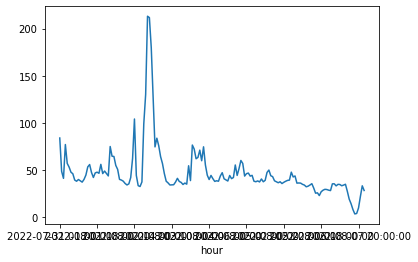

In [8]:
#show node graph
total_merge["AMESBS_1_N101"].plot()
pyplot.show()
